In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report 
from sklearn import preprocessing

In [2]:
data=pd.read_csv("Fraud_check.csv")

In [3]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

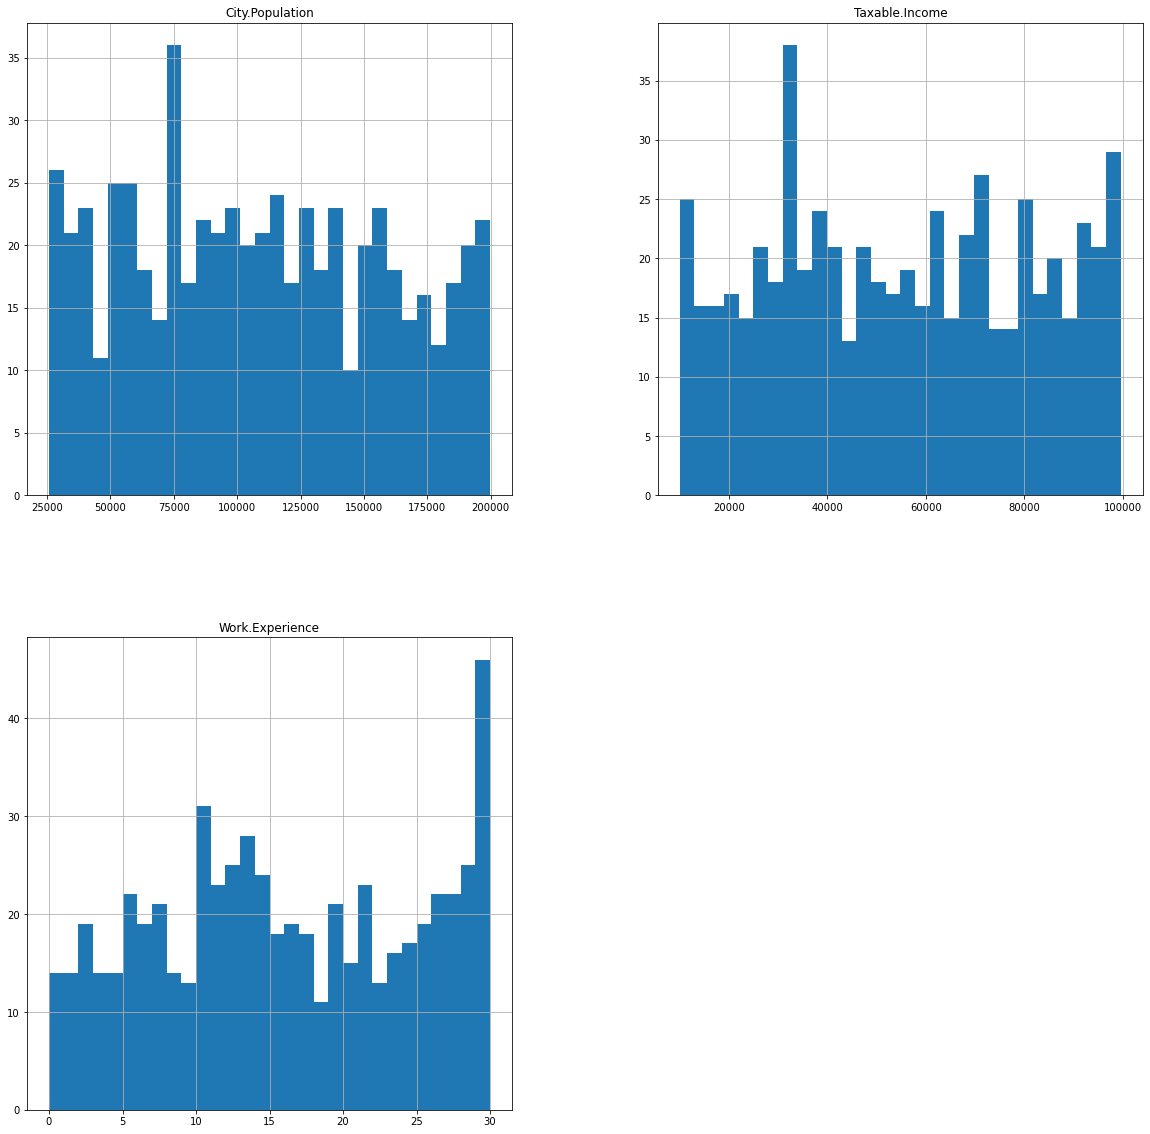

In [5]:
data.hist(bins=30,figsize=(20,20))
plt.show()

In [6]:
#data=pd.get_dummies(data=data,columns=['Undergrad','Marital.Status','Urban'])
label_encoder=preprocessing.LabelEncoder()
data['Undergrad']=label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status']=label_encoder.fit_transform(data['Marital.Status'])
data['Urban']=label_encoder.fit_transform(data['Urban'])

In [7]:
A=data[['Taxable.Income']].copy()

In [8]:
A[data['Taxable.Income']<=30000]=1
A[data['Taxable.Income']>30000]=0

In [9]:
data[['Taxable.Income']]=A.copy()

In [10]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
...,...,...,...,...,...,...
595,1,0,0,39492,7,1
596,1,0,0,55369,2,1
597,0,0,0,154058,0,1
598,1,1,0,180083,17,0


In [11]:
data[data['Taxable.Income']==1].shape

(124, 6)

In [12]:
x=data.iloc[:,1:]
y=data.iloc[:,0:1]

In [13]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=2)
model.fit(x,y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

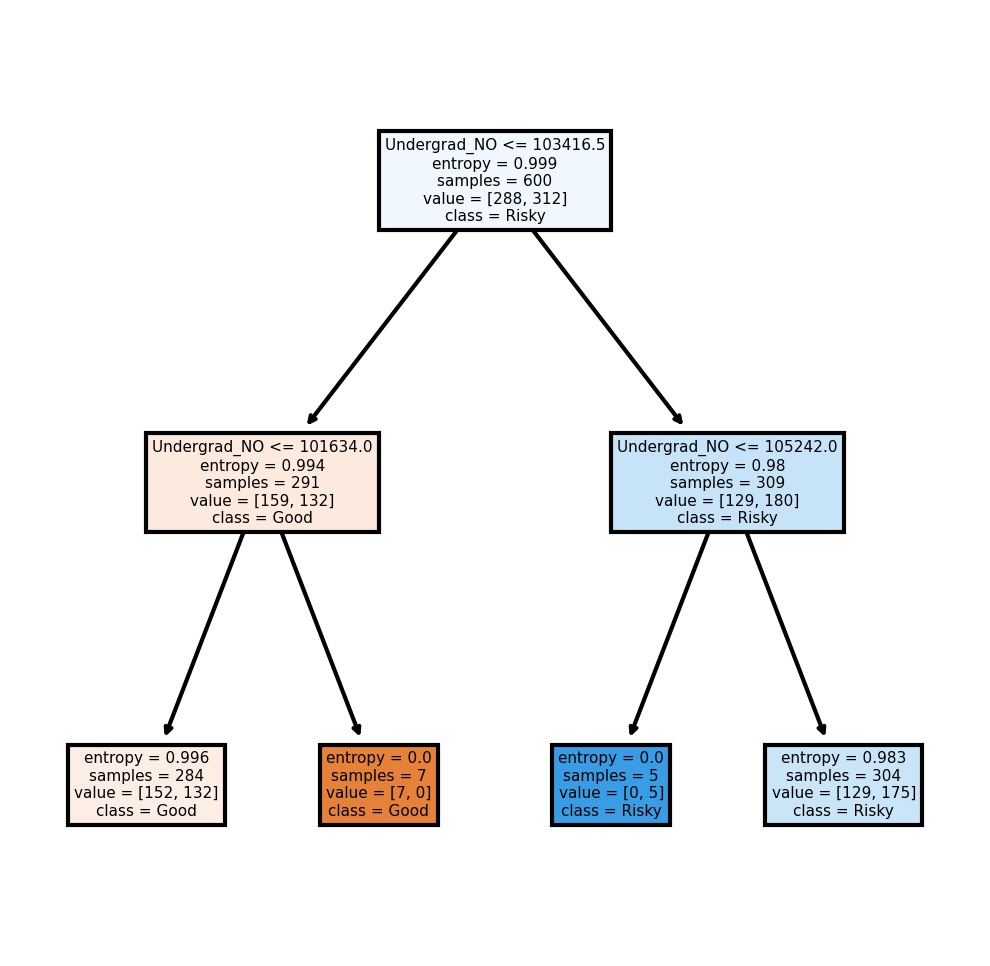

In [14]:
fn=['City.Population','Work.Experience','Undergrad_NO','Undergrad_YES','Marital.Status_Divorced','Marital.Status_Married','Marital.Status_Single','Urban_NO','Urban_YES']
cn=['Good','Risky']
fig , axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn, class_names=cn, filled=True)
plt.show()

In [15]:
pred = model.predict(x) # predicting on test data set 
pd.Series(pred).value_counts() # getting the count of each category 

1    309
0    291
dtype: int64

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,pred)
print(confusion_matrix)

[[159 129]
 [132 180]]


In [17]:
(confusion_matrix[0,0]+confusion_matrix[1,1])/(confusion_matrix.sum())

0.565

In [ ]:
#1>Get dummies 0.795 gini accuracy

[[474   2]
 [121   3]]

#2>Get dummies 0.793 entropy accuracy

[[476   0]
 [124   0]]

#3>label encoder 0.575 gini accuracy

[[170 118]
 [137 175]]

#4>label encoder 0.565 entropy accuracy

[[159 129]
 [132 180]]

In [18]:
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55       288
           1       0.58      0.58      0.58       312

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.57      0.56      0.57       600



In [ ]:
# Get dummies gini(low f1 scores)

              precision    recall  f1-score   support

           0       0.80      1.00      0.89       476
           1       0.60      0.02      0.05       124

    accuracy                           0.80       600
   macro avg       0.70      0.51      0.47       600
weighted avg       0.76      0.80      0.71       600

This model has great probability of indentifying good customers but very low probability 
of indentifying faulty customers. yet the overall accuracy of model is good due to large 
number of good customers in trained model. If the model has equal number of good and risky 
customers, this model will performance will decrease.

# Get dummies entropy

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       476
           1       0.00      0.00      0.00       124

    accuracy                           0.79       600
   macro avg       0.40      0.50      0.44       600
weighted avg       0.63      0.79      0.70       600

This model has 0 pobability of identifying a risky model, so this model should be rejected.
 
# label encoder gini
              precision    recall  f1-score   support

           0       0.55      0.59      0.57       288
           1       0.60      0.56      0.58       312

    accuracy                           0.57       600
   macro avg       0.58      0.58      0.57       600
weighted avg       0.58      0.57      0.58       600

the accuracy of the model is low but can be employed.
# label encoder entropy

               precision    recall  f1-score   support

           0       0.55      0.55      0.55       288
           1       0.58      0.58      0.58       312

    accuracy                           0.56       600
   macro avg       0.56      0.56      0.56       600
weighted avg       0.57      0.56      0.57       600

the accuracy of the model is low but can be employed.